In [11]:
from src_2020.Parser import parse
import sys

def load_solution(input_file, solution_file):
    _, _, nb_days, scores, libs, books = parse(input_file)
    all_books = set()
    libraries_used = set()
    day = 0
    all_lines = open(solution_file).read().split('\n')
    est_nb_libs = len(all_lines)-1 // 2
    lib_order = []
    for i, line in enumerate(all_lines):
        if len(line.strip()) == 0: break
        if i == 0:
            nb_libraries = int(line)
            continue
        if i%2 == 1:
            library_id, nb_books = map(int,line.strip().split())

            # safety check
            if library_id in libraries_used:
                print("warning! library %d used twice" % library_id)
            libraries_used.add(library_id)
        else:
            lib_books = list(map(int,line.strip().split()))
            
        
            # set the solution
            libs[library_id].signup_on = day
            libs[library_id].books_to_scan = lib_books
            lib_order += [(library_id, day)]
            
            day += libs[library_id].signup
            #print("library",library_id,"nb_books",nb_books)
            #print("books:",lib_books)
            all_books |= set(lib_books)
            remaining_days = nb_days - day
            if len(lib_books) > remaining_days * libs[library_id].ship:
                print("warning! library",library_id,"(number %d/%d in solution)" % (i//2,est_nb_libs),"with capacity",libs[library_id].ship,"outputs more books than it has time for (%d > %d)" % (len(lib_books), remaining_days * libs[library_id].ship))

    print(len(all_books),"books total were selected, ",remaining_days,"unused signup day(s)")
    return libs, lib_order, nb_days

In [12]:
#libs, lib_order, nb_days = load_solution("a_example.txt","../res_2020/a_sol.txt")
#libs, lib_order, nb_days = load_solution("b_read_on.txt","../res_2020/b_sol.txt")
#libs, lib_order, nb_days = load_solution("c_incunabula.txt","../res_2020/c_sol.txt")
#libs, lib_order, nb_days = load_solution("d_tough_choices.txt","../res_2020/d_sol.txt")
#libs, lib_order, nb_days = load_solution("e_so_many_books.txt","../res_2020/e_sol.txt")
libs, lib_order, nb_days = load_solution("f_libraries_of_the_world.txt","../res_2020/f_sol.txt")

12871 books total were selected,  6 unused signup day(s)


In [13]:
%matplotlib inline
import seaborn as sns
import pandas as pd

#libs = libs[:100]

df = pd.DataFrame()
df['id'] = [lib.ide for lib in libs]
df['signup_on'] = [lib.signup_on for lib in libs]
df['signup'] = [lib.signup for lib in libs]
df['nb_books'] = [len(lib.books) for lib in libs]
lib_signedup_rank=dict([(library_id,i) for (i,(library_id,day)) in enumerate(lib_order)])
df['signup_rank'] = [lib_signedup_rank[i] if i in lib_signedup_rank else -1 for i in range(len(libs))]
df.set_index('id',drop=True)
df = df.sort_values(['signup_on']) # sort by signup-on time
df = df[df['signup_on'] != -1] # select only selected libs


lib 147 is only scanned until 232.2
lib 204 is only scanned until 656.5
lib 209 is only scanned until 568.25
lib 210 is only scanned until 700.0
lib 312 is only scanned until 412.7142857142857
lib 369 is only scanned until 493.1428571428571
lib 422 is only scanned until 329.42857142857144
lib 431 is only scanned until 700.0
lib 595 is only scanned until 361.5
lib 618 is only scanned until 700.0
lib 622 is only scanned until 274.57142857142856
lib 672 is only scanned until 460.1111111111111
lib 694 is only scanned until 416.83333333333337
lib 719 is only scanned until 659.0
lib 774 is only scanned until 285.6
lib 828 is only scanned until 525.125
lib 901 is only scanned until 687.8888888888889


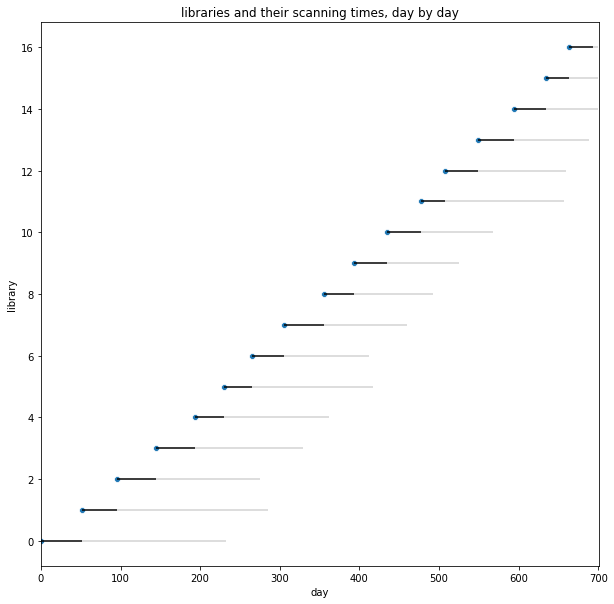

In [14]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="signup_on", y="signup_rank", data=df)
ax.set(xlabel='day', ylabel='library',xlim=(0,nb_days+1))
ax.set_title("libraries and their scanning times, day by day")

from matplotlib import collections  as mc

# draw signup times
lines = [[(lib.signup_on, lib_signedup_rank[lib.ide]), (lib.signup_on + lib.signup, lib_signedup_rank[lib.ide])] for lib in libs if lib.ide in lib_signedup_rank]
lc = mc.LineCollection(lines, colors='black', linewidths=1.5)    
ax.add_collection(lc)
# and more importantly, draw the time it takes to scan the books
lines = [[(lib.signup_on+ lib.signup, lib_signedup_rank[lib.ide]), (lib.signup_on + lib.signup + len(lib.books_to_scan)/lib.ship, lib_signedup_rank[lib.ide])] for lib in libs if lib.ide in lib_signedup_rank]
lc = mc.LineCollection(lines, colors='lightgray', linewidths=1.5)    
ax.add_collection(lc)
#print(sorted(lines))

# sanity check, if any lib is not scanned until the end, report it here
for lib in libs:
    if lib.signup_on != -1:
        if (lib.signup_on + lib.signup + len(lib.books_to_scan)/lib.ship) != 200:
            print("lib",lib.ide,"is only scanned until",lib.signup_on + lib.signup + len(lib.books_to_scan)/lib.ship)
None